In [1]:
# Drive mount to Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
# Loading dataset
data_path = "/content/drive/MyDrive/Gradious_Assignments/Mini_Project_ML/gradious_ML_mini_project.csv"
df = pd.read_csv(data_path)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
print(df.shape)
# print(df.describe())
print(df.info())

(4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Marital_Status_Code          4424 non-null   int64  
 1   Application_Method           4424 non-null   int64  
 2   Application_Sequence         4424 non-null   int64  
 3   Program_ID                   4424 non-null   int64  
 4   Attendance_Type              4424 non-null   int64  
 5   Prior_Qualification_Code     4424 non-null   int64  
 6   Prior_Qualification_Score    4424 non-null   float64
 7   Nationality_Code             4424 non-null   int64  
 8   Mother's_Education_Level     4424 non-null   int64  
 9   Father's_Education_Level     4424 non-null   int64  
 10  Mother's_Job_Category        4424 non-null   int64  
 11  Father's_Job_Category        4424 non-null   int64  
 12  Admission_Score              4424 non-null   float64
 13  Student

In [6]:
# The values the given target can have
df['Outcome'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

### The given dataset has students data given and we have to predict whether a given student has droppedout or has graduated or is still enrolled in the course.

In [7]:
df.head()

,Marital_Status_Code,Application_Method,Application_Sequence,Program_ID,Attendance_Type,Prior_Qualification_Code,Prior_Qualification_Score,Nationality_Code,Mother's_Education_Level,Father's_Education_Level,Mother's_Job_Category,Father's_Job_Category,Admission_Score,Student_Displacement_Flag,Special_Educational_Needs,Outstanding_Debts_Flag,Tuition_Fees_UpToDate_Flag,Gender_Code,Scholarship_Recipient_Flag,Enrollment_Age,International_Status,Credits_1st_Semester,Enrolled_1st_Semester,Evaluations_1st_Semester,Passed_1st_Semester,Grade_1st_Semester,No_Evaluations_1st_Semester,Credits_2nd_Semester,Enrolled_2nd_Semester,Evaluations_2nd_Semester,Passed_2nd_Semester,Grade_2nd_Semester,No_Evaluations_2nd_Semester,Local_Unemployment_Rate,Inflation_Rate,Regional_GDP,Outcome
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
# No null values
df.isna().sum()

,0
Marital_Status_Code,0
Application_Method,0
Application_Sequence,0
Program_ID,0
Attendance_Type,0
Prior_Qualification_Code,0
Prior_Qualification_Score,0
Nationality_Code,0
Mother's_Education_Level,0
Father's_Education_Level,0


In [9]:
# Checking Dataset Balance
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True))

Outcome
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Outcome
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64


### The given dataset is unbalanced as the number of student entries that have graduated is 3 times of those who are still enrolled.

In [10]:
# Dropping Program ID as it is useless in predictions
df.drop(['Program_ID'], axis = 1, inplace = True)

In [11]:
# Encoding outcome with ordinal encoder as there is an order to our categories
oe = OrdinalEncoder(categories=[['Dropout', 'Enrolled', 'Graduate']])
df['Outcome'] = oe.fit_transform(df[['Outcome']])
df['Outcome'] = df['Outcome'].astype('int')

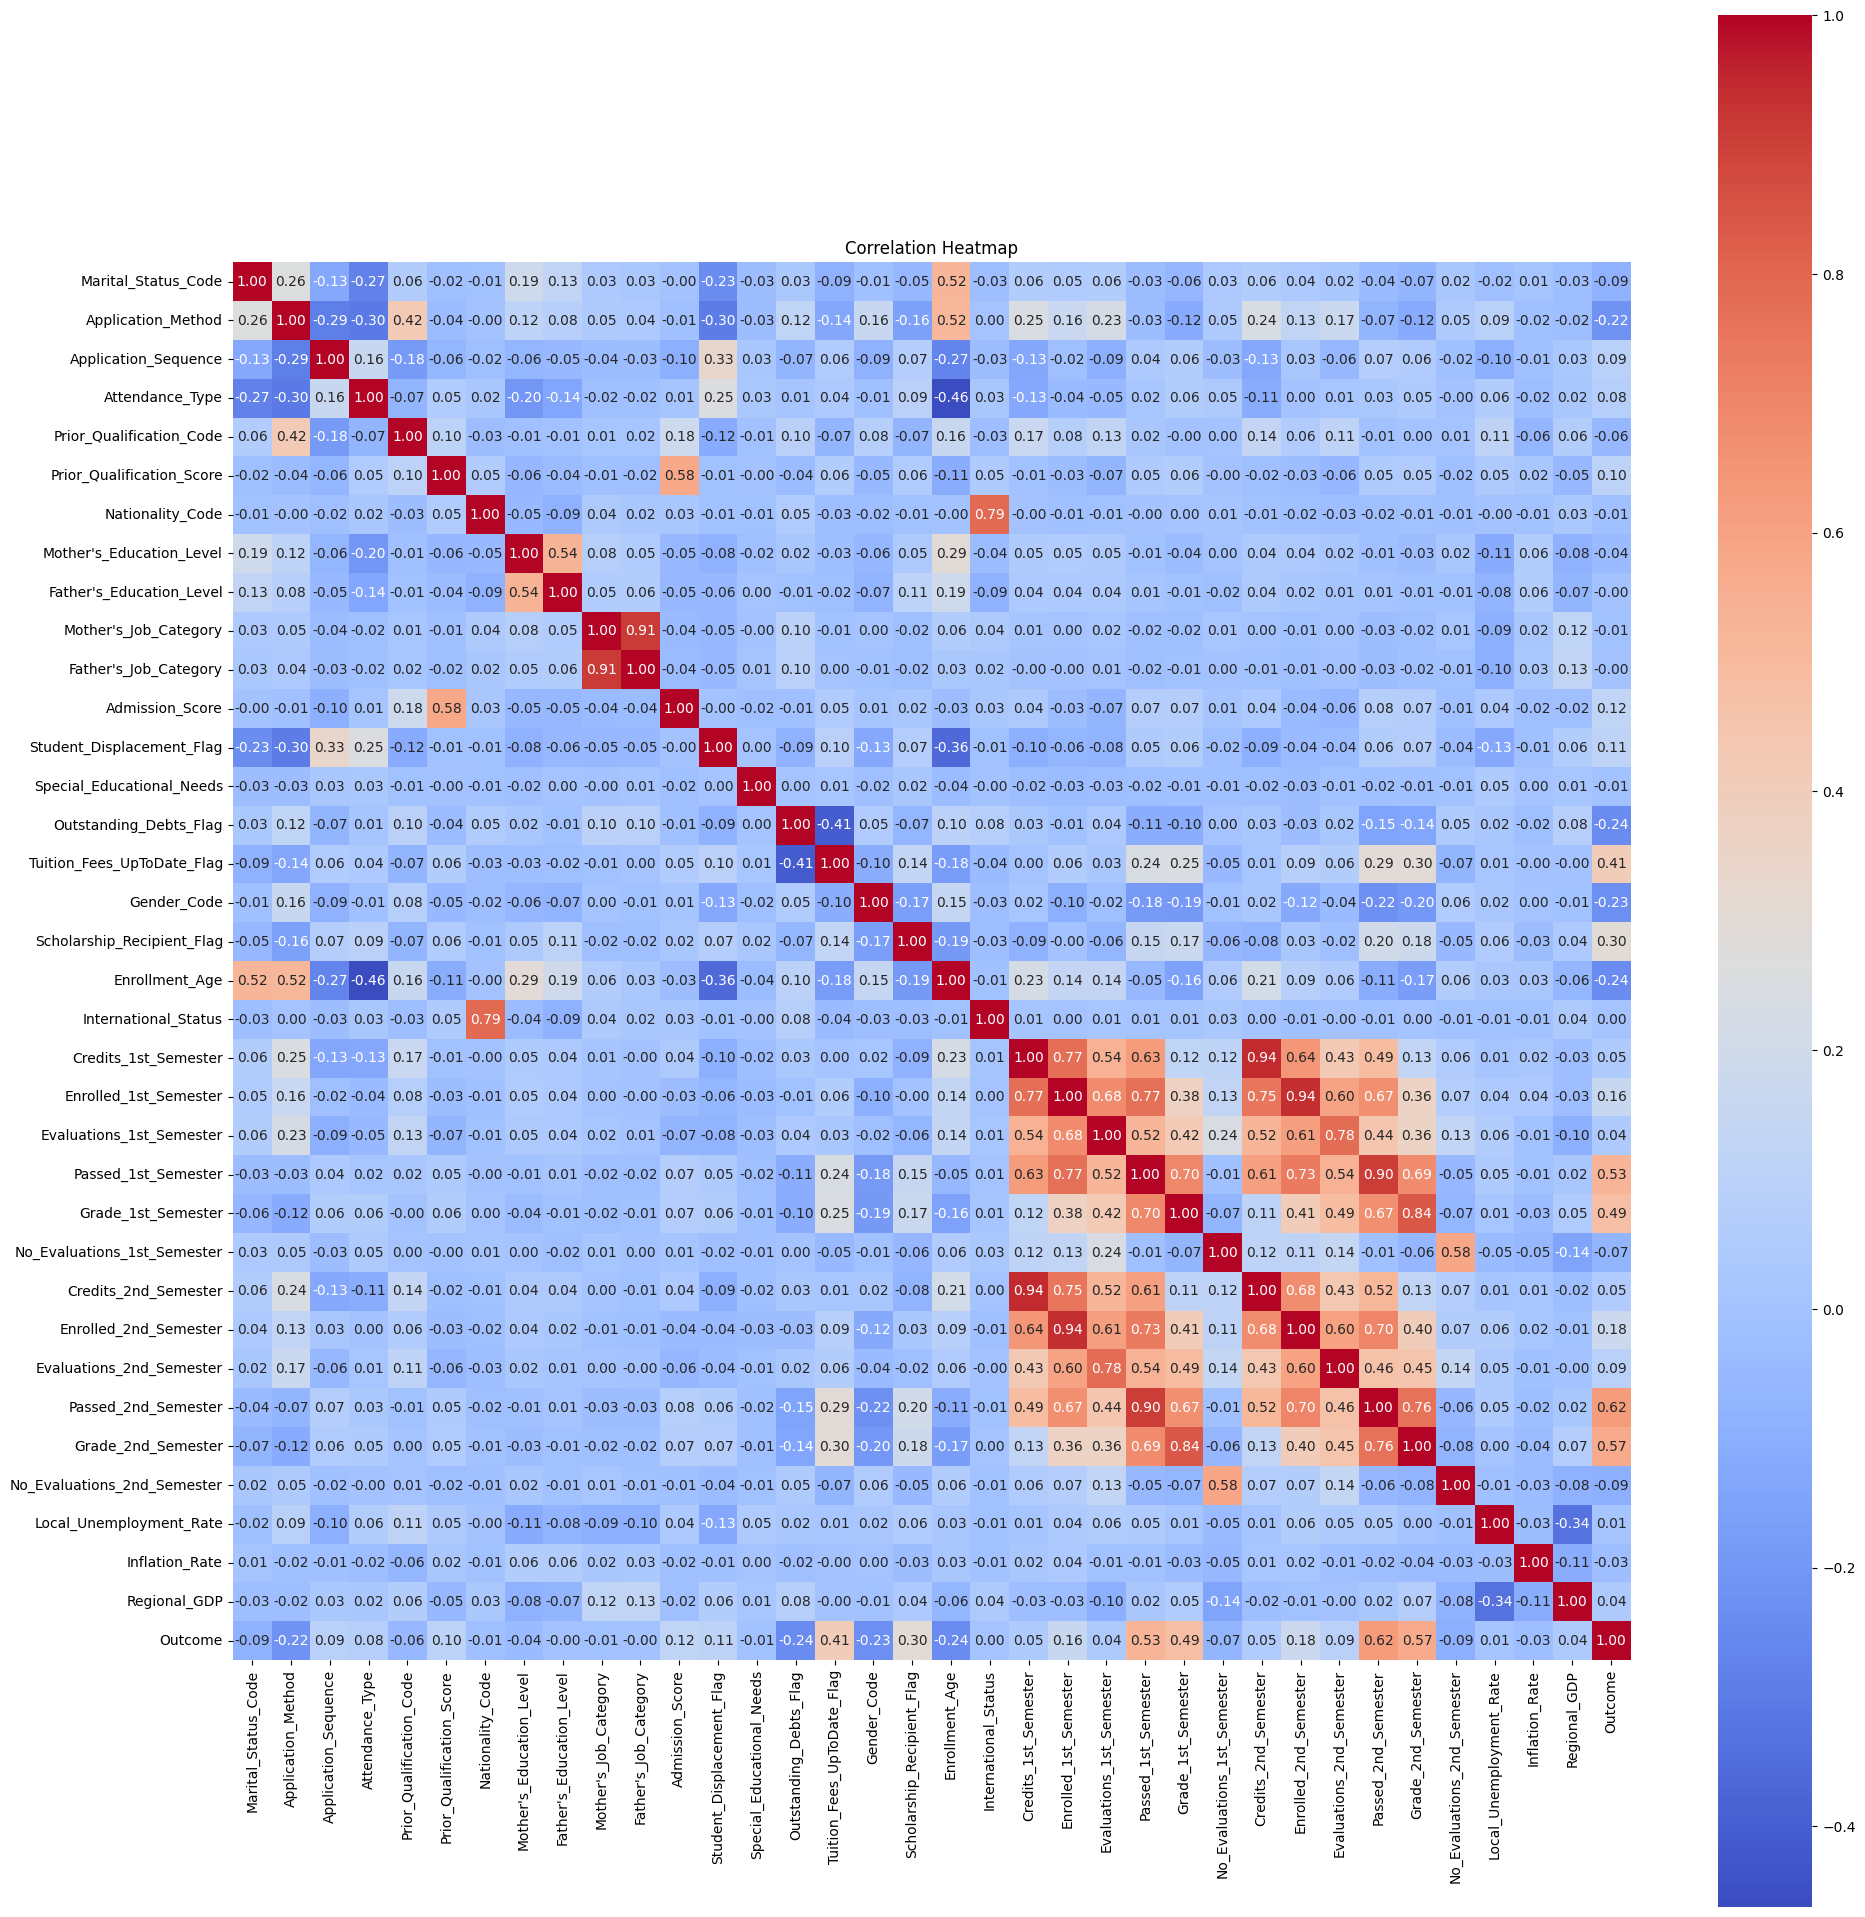

In [12]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [13]:
# Selected best features with a correlation of more than 0.1
target_corr = corr['Outcome']
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
best_features = target_corr_sorted[target_corr_sorted > 0.1].index
best_features

Index(['Outcome', 'Passed_2nd_Semester', 'Grade_2nd_Semester',
       'Passed_1st_Semester', 'Grade_1st_Semester',
       'Tuition_Fees_UpToDate_Flag', 'Scholarship_Recipient_Flag',
       'Enrollment_Age', 'Outstanding_Debts_Flag', 'Gender_Code',
       'Application_Method', 'Enrolled_2nd_Semester', 'Enrolled_1st_Semester',
       'Admission_Score', 'Student_Displacement_Flag',
       'Prior_Qualification_Score'],
      dtype='object')

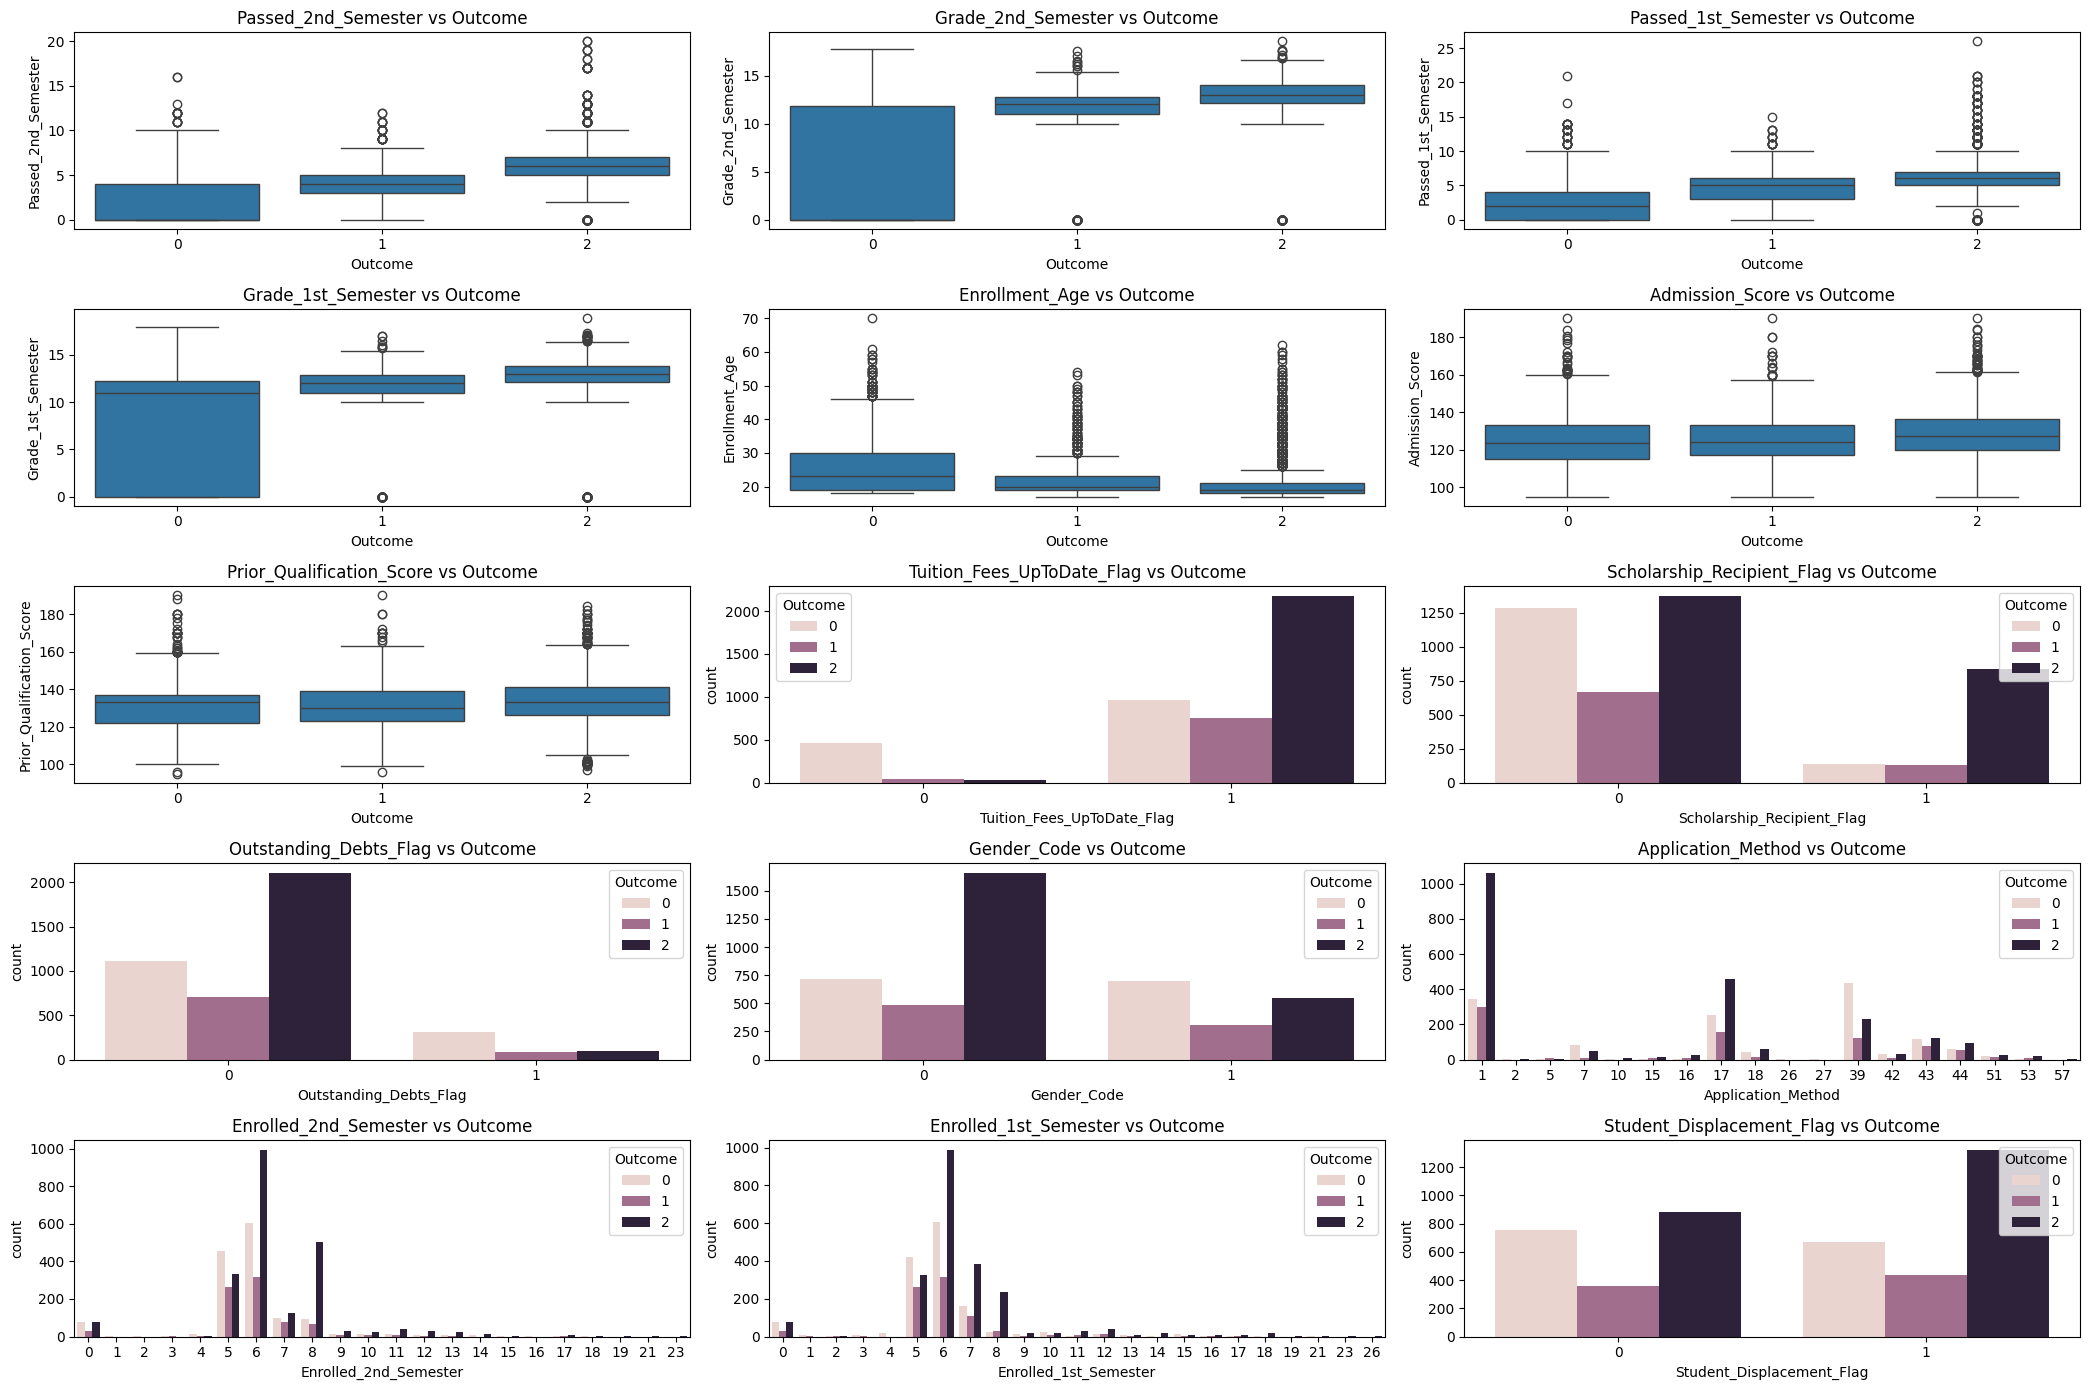

In [14]:
# Box Plots for numeric data columns vs Outcome
rows = 5
col = 3
fig, axes = plt.subplots(rows, col, figsize=(21, 14))
axes = axes.flatten()
num_feats = ['Passed_2nd_Semester','Grade_2nd_Semester','Passed_1st_Semester',
             'Grade_1st_Semester','Enrollment_Age','Admission_Score','Prior_Qualification_Score']
cat_feats = ['Tuition_Fees_UpToDate_Flag','Scholarship_Recipient_Flag','Outstanding_Debts_Flag',
             'Gender_Code','Application_Method','Enrolled_2nd_Semester','Enrolled_1st_Semester',
             'Student_Displacement_Flag']
total_feats = num_feats+cat_feats
for i,c in enumerate(total_feats):
  if c in num_feats:
    sns.boxplot(x = 'Outcome', y = c, data = df, ax = axes[i])
    plt.title(f'{c} vs Outcome')
  elif c in cat_feats:
    sns.countplot(x = c, hue = 'Outcome', data = df, ax = axes[i])
    plt.title(f'{c} vs Outcome')
  axes[i].set_title(f'{c} vs Outcome')
plt.tight_layout()
plt.show()

In [15]:
# Feature Engineering over the most impactful features
def feature_engineering(df):
  """
  Input : DataFrame
  Output : New DataFrame with added new features"""
  df_fe = df.copy()
  # Average Grade across both the semesters
  df_fe['Overall_Grade'] = (df_fe['Grade_1st_Semester'] + df_fe['Grade_2nd_Semester']) / 2
  # upword or downward grade
  df_fe['Grade_Improvement'] = df_fe['Grade_2nd_Semester'] - df_fe['Grade_1st_Semester']
  # How many semester passed successfully
  df_fe['Sems_Passed'] = (df_fe['Passed_1st_Semester'] + df_fe['Passed_2nd_Semester']) / 2
  # Total Credits Enrolled in
  df_fe['Total_Credits'] = df_fe['Enrolled_1st_Semester'] + df_fe['Enrolled_2nd_Semester']
  # Grouping age into categories
  df_fe['Age_Group'] = pd.cut(df_fe['Enrollment_Age'], bins = [0, 20, 23, 100], labels = ['<20', '20-23', '24+'])
  # Financial Indicators
  df_fe['Tuition_Fees_Flag'] = ((df_fe['Tuition_Fees_UpToDate_Flag'] == 0) | (df_fe['Outstanding_Debts_Flag'] == 1)).astype(int)

  return df_fe

In [16]:
# Function to clip numeric data
def clip_outliers(df, cols = None):
  df_co = df.copy()
  if cols is None:
    cols = df_co.select_dtypes(include='number').columns
  for c in cols:
    q1, q3 = df_co[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df_co[c] = df_co[c].clip(lower, upper)
  return df_co

In [17]:
df_fe = feature_engineering(df)

In [18]:
len(df)

4424

In [19]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'Passed_2nd_Semester','Grade_2nd_Semester','Passed_1st_Semester',
    'Grade_1st_Semester','Enrollment_Age','Admission_Score',
    'Prior_Qualification_Score','Overall_Grade','Grade_Improvement',
    'Sems_Passed','Total_Credits', 'Application_Method'
]

# clipping data for scaling numerical features
df_clean = clip_outliers(df_fe, cols = num_cols)

scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# Encoding Age Group
df_clean['Age_Group'] = df_clean['Age_Group'].map({'<20': 0, '20-23': 1, '24+': 2})

df_clean.head()


,Marital_Status_Code,Application_Method,Application_Sequence,Attendance_Type,Prior_Qualification_Code,Prior_Qualification_Score,Nationality_Code,Mother's_Education_Level,Father's_Education_Level,Mother's_Job_Category,Father's_Job_Category,Admission_Score,Student_Displacement_Flag,Special_Educational_Needs,Outstanding_Debts_Flag,Tuition_Fees_UpToDate_Flag,Gender_Code,Scholarship_Recipient_Flag,Enrollment_Age,International_Status,Credits_1st_Semester,Enrolled_1st_Semester,Evaluations_1st_Semester,Passed_1st_Semester,Grade_1st_Semester,No_Evaluations_1st_Semester,Credits_2nd_Semester,Enrolled_2nd_Semester,Evaluations_2nd_Semester,Passed_2nd_Semester,Grade_2nd_Semester,No_Evaluations_2nd_Semester,Local_Unemployment_Rate,Inflation_Rate,Regional_GDP,Outcome,Overall_Grade,Grade_Improvement,Sems_Passed,Total_Credits,Age_Group,Tuition_Fees_Flag
0,1,-0.095470,5,1,1,-0.834072,1,19,12,5,9,0.035097,1,0,0,1,1,0,-0.454236,0,0,0,0,-1.681426,-1.923650,0,0,0,0,-1.511364,-1.786401,0,10.8,1.4,1.74,0,-1.737057,0.081906,-1.622967,-2.659896,0,0
1,1,-0.209869,1,1,1,2.183947,1,1,3,3,3,1.121187,1,0,0,0,1,0,-0.639106,0,0,6,6,0.519569,0.935356,0,0,6,6,0.546584,0.791523,0,13.9,-0.3,0.79,2,0.913071,-0.250162,0.537598,-0.111534,0,1
2,1,-1.010660,5,1,1,-0.834072,1,37,37,9,9,-0.143537,1,0,0,0,1,0,-0.639106,0,0,6,0,-1.681426,-1.923650,0,0,6,0,-1.511364,-1.786401,0,10.8,1.4,1.74,0,-1.737057,0.081906,-1.622967,-0.111534,0,1
3,1,-0.095470,2,1,1,-0.834072,1,38,37,5,3,-0.515094,1,0,0,1,0,0,-0.454236,0,0,6,8,0.519569,0.687823,0,0,6,10,0.203593,0.310732,0,9.4,-0.8,-3.12,2,0.522334,-0.942760,0.357550,-0.111534,0,0
4,2,1.162916,1,0,1,-2.382792,1,37,38,9,9,1.049734,0,0,0,1,0,0,2.133947,0,0,6,9,0.152736,0.213385,0,0,6,6,0.546584,0.538475,0,13.9,-0.3,0.79,2,0.417058,0.746041,0.357550,-0.111534,2,0


In [20]:
# General Function to Fit ML Models
def model_fitting(df, target, test_size = 0.2):
  X = df.drop(columns = [target])
  y = df[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 18)

  models = {
      'LogisticRegression': LogisticRegression(max_iter = 500),
      'RandomForest': RandomForestClassifier(n_estimators = 200, random_state = 18),
      'GradientBoosting': GradientBoostingClassifier(random_state = 18),
      'SVC': SVC(probability = True, random_state = 18),
      'KNN': KNeighborsClassifier(),
      'XGBoost': XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss', random_state = 18, enable_categorical=True)
  }

  result = []
  for name, model in models.items():
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    result.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, test_pred),
        'Precision: ': precision_score(y_test, test_pred, average="macro"),
        'Recall': recall_score(y_test, test_pred, average="macro"),
        'F1': f1_score(y_test, test_pred, average="macro")
      })
  return pd.DataFrame(result).sort_values(by = 'Accuracy', ascending = False)

In [21]:
result = model_fitting(df_clean, 'Outcome')

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:12:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
print(result)

                Model  Accuracy  Precision:     Recall        F1
1        RandomForest  0.800000     0.761671  0.705706  0.724078
2    GradientBoosting  0.790960     0.746389  0.693735  0.710891
5             XGBoost  0.770621     0.710625  0.674548  0.686714
0  LogisticRegression  0.769492     0.703579  0.664445  0.675478
3                 SVC  0.697175     0.609768  0.542252  0.521951
4                 KNN  0.655367     0.582655  0.559806  0.566952


In [23]:
# Updated training function With hyper parameter tuning
def finteune_models(df, target, test_size = 0.2, random_state = 18):
  """Hyperparameter tuning using GridSearchCV

  Args:
    df - Pandas DataFrame
    target - our target feature in the given dataframe
    test_size - the split size of test data

  Returns:
    df - Pandas DataFrame
  """
  X = df.drop(columns = [target])
  y = df[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  models = {
      "LogisticRegression": LogisticRegression(max_iter=1000, random_state=random_state),
      "RandomForest": RandomForestClassifier(random_state=random_state),
      "GradientBoosting": GradientBoostingClassifier(random_state=random_state),
      "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=random_state, enable_categorical=True),
  }

  param_grids = {
      'LogisticRegression': {
          'C': [0.1, 1.0, 10],
          'solver': ['liblinear', 'saga']
      },
      'RandomForest': {
          'n_estimators': [100, 200, 300],
          'max_depth': [10, 20, None],
          'min_samples_leaf': [1, 2]
      },
      'GradientBoosting': {
          'n_estimators': [100, 200],
          'learning_rate': [0.01, 0.1],
          'max_depth': [3, 5]
      },
      'XGBoost': {
          'n_estimators': [100, 200],
          'learning_rate': [0.01, 0.1],
          'max_depth': [3, 5, 7]
      }
  }

  results = []

  # Iteration and Evaluation
  for name, model in models.items():
    print(f"Tuning {name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, average='weighted')
    test_recall = recall_score(y_test, test_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')

    results.append({
        'Model': name,
        'Best Accuracy (CV)': grid_search.best_score_,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1-Score': test_f1,
        'Best Parameters': grid_search.best_params_
    })

  return pd.DataFrame(results).sort_values(by = 'Test Accuracy', ascending=False)

In [ ]:
fine_tuned_results = finteune_models(df_clean, 'Outcome')

Tuning LogisticRegression
Tuning RandomForest
Tuning GradientBoosting
Tuning XGBoost


In [ ]:
fine_tuned_results

In [ ]:
def visualise_results(results_df):
  """Function to Visualise the performance of model using bar chart"""

  df_melted = results_df.melt(
        id_vars='Model',
        value_vars=['Best Accuracy (CV)', 'Test Accuracy','Test F1-Score'],
        var_name='Score Type',
        value_name='Accuracy'
  )

  plt.figure(figsize=(12, 7))
  ax = sns.barplot(data=df_melted, x='Model', y='Accuracy', hue='Score Type')
  plt.title('Model Performance Comparison', fontsize=16)
  plt.xlabel('Model', fontsize=12)
  plt.ylabel('Accuracy Score', fontsize=12)
  plt.legend(title='Score Type')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()

In [ ]:
visualise_results(fine_tuned_results)